# CIVE 202 Project 5: Automated Concrete Mix Design using Python

This notebook calculates and compares the component weights of four concrete mix scenarios using a Python function derived from the NDOT Excel calculator.

In [7]:
def calculate_mix_design(cement_kg, water_cement_ratio, flyash_pct, ggbfs_pct, 
                         fine_agg_pct, coarse_agg_pct, admixture_pct):
    """
    Calculate mix design weights per 1 cubic yard of concrete.
    Inputs are in kg or percent (by mass).
    Returns a dictionary of component weights in kg.
    """
    # Total cementitious material = cement + flyash + GGBFS
    cementitious_total = cement_kg / (1 - (flyash_pct + ggbfs_pct) / 100)

    flyash_kg = cementitious_total * (flyash_pct / 100)
    ggbfs_kg = cementitious_total * (ggbfs_pct / 100)
    water_kg = cement_kg * water_cement_ratio
    fine_agg_kg = cementitious_total * (fine_agg_pct / 100)
    coarse_agg_kg = cementitious_total * (coarse_agg_pct / 100)
    admixture_kg = cementitious_total * (admixture_pct / 100)

    return {
        "Cement (kg)": cement_kg,
        "Flyash (kg)": flyash_kg,
        "GGBFS (kg)": ggbfs_kg,
        "Water (kg)": water_kg,
        "Fine Aggregate (kg)": fine_agg_kg,
        "Coarse Aggregate (kg)": coarse_agg_kg,
        "Admixture (kg)": admixture_kg
    }

In [8]:
# Define four mix scenarios
mixes = {
    "Standard Mix": calculate_mix_design(300, 0.45, 10, 10, 35, 45, 1),
    "High Strength Mix": calculate_mix_design(400, 0.35, 5, 5, 30, 55, 2),
    "Eco-Friendly Mix": calculate_mix_design(280, 0.50, 20, 15, 40, 35, 1),
    "Workability Mix": calculate_mix_design(320, 0.60, 5, 5, 45, 35, 3)
}

# Create a DataFrame for display and plotting
import pandas as pd
mix_df = pd.DataFrame(mixes).T  # transpose to have mixes as rows
mix_df

,Cement (kg),Flyash (kg),GGBFS (kg),Water (kg),Fine Aggregate (kg),Coarse Aggregate (kg),Admixture (kg)
Standard Mix,300.0,37.500000,37.500000,135.0,131.250000,168.750000,3.750000
High Strength Mix,400.0,22.222222,22.222222,140.0,133.333333,244.444444,8.888889
Eco-Friendly Mix,280.0,86.153846,64.615385,140.0,172.307692,150.769231,4.307692
Workability Mix,320.0,17.777778,17.777778,192.0,160.000000,124.444444,10.666667


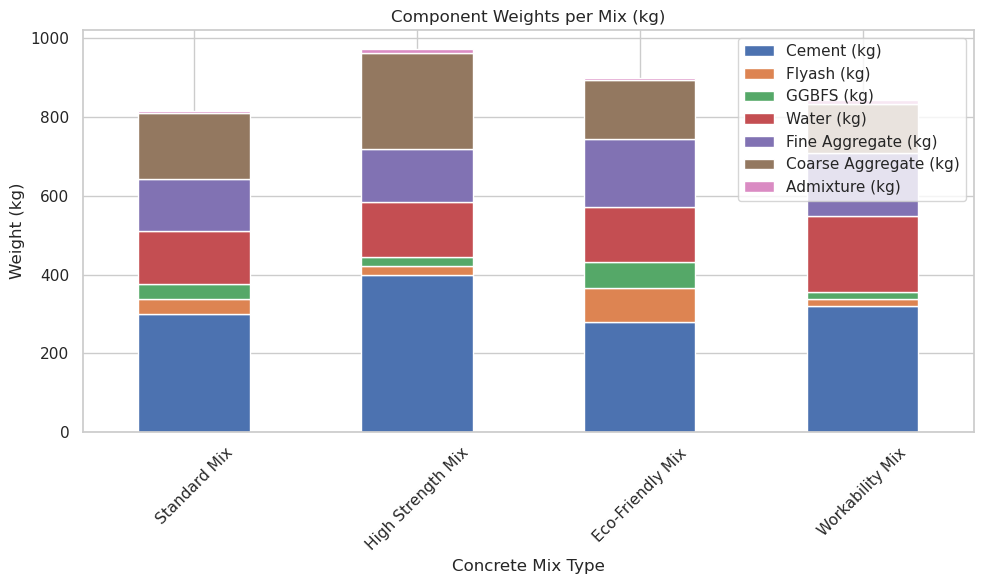

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plot 1: Stacked bar chart
ax1 = mix_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Component Weights per Mix (kg)")
plt.ylabel("Weight (kg)")
plt.xlabel("Concrete Mix Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

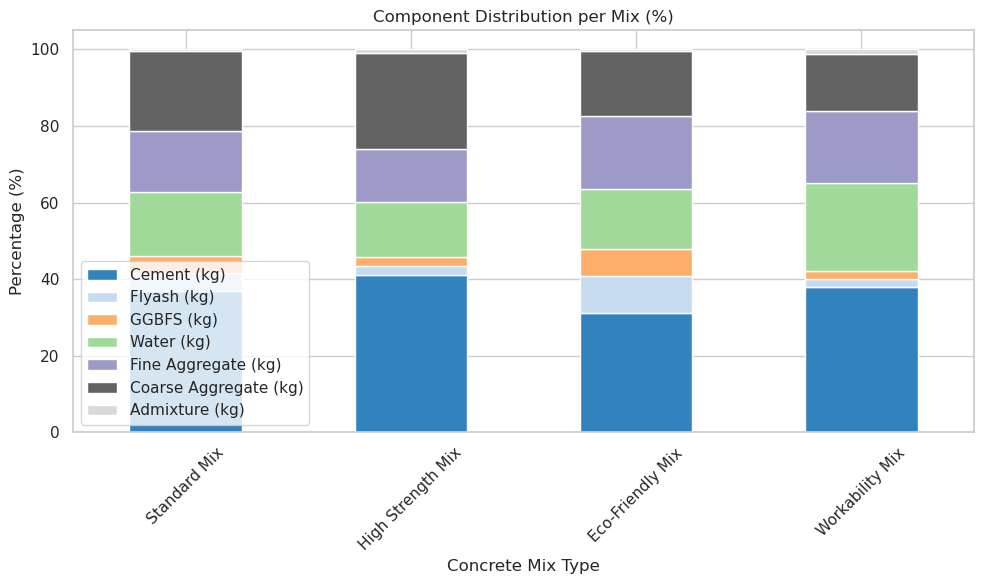

In [10]:
# Plot 2: Percentage distribution
mix_pct = mix_df.div(mix_df.sum(axis=1), axis=0) * 100
ax2 = mix_pct.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20c")
plt.title("Component Distribution per Mix (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Concrete Mix Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()